In [1]:
import pandas as pd
import matplotlib
import numpy as np

matplotlib.rcParams.update({'font.size': 22})

In [2]:
%pip install pydot

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('data/UNSW_NB15_training-set.csv')

In [4]:
feat = pd.read_csv('data/UNSW_NB15_features.csv', encoding='cp1252')

In [114]:
##### EXPLORATORY DATA ANALYSIS #####

In [5]:
feat.head(50)

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [6]:
df.shape

(82332, 45)

In [7]:
df.sample(5).head().T

,42344,55018,52932,4816,69358
id,42345,55019,52933,4817,69359
dur,0.359699,0.000011,25.090731,0.22426,0.592256
proto,tcp,udp,ospf,tcp,tcp
service,-,dns,-,http,-
state,FIN,INT,INT,FIN,FIN
spkts,10,2,42,10,10
dpkts,6,0,0,8,6
sbytes,534,114,2184,792,2516
dbytes,268,0,0,1668,268
rate,41.701533,90909.0902,1.63407,75.804869,25.326885


In [8]:
df['attack_cat'].value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

<AxesSubplot:title={'center':'Number of attacks by category'}>

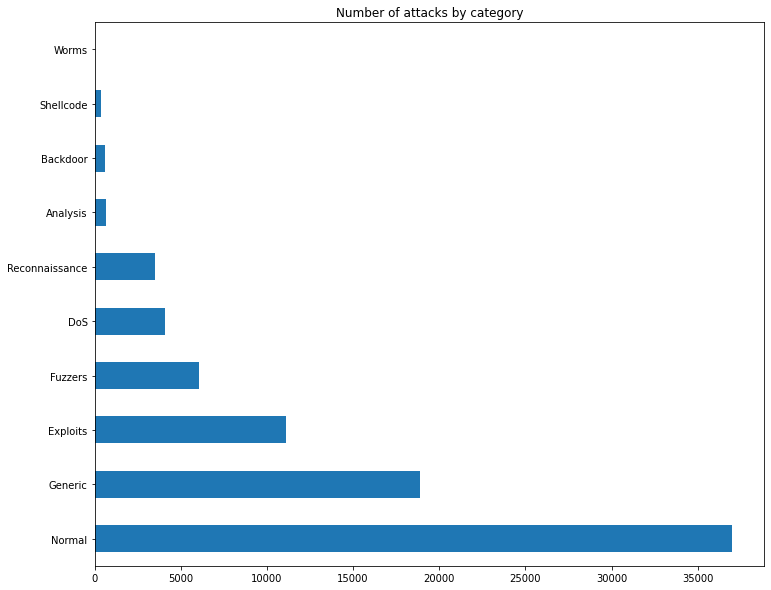

In [9]:
df['attack_cat'].value_counts().plot(kind='barh', title='Number of attacks by category', figsize=(12, 10))

In [10]:
df.isna().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

<AxesSubplot:title={'center':'Normal vs Malicious packet breakdown'}, ylabel='Benign or Malicious'>

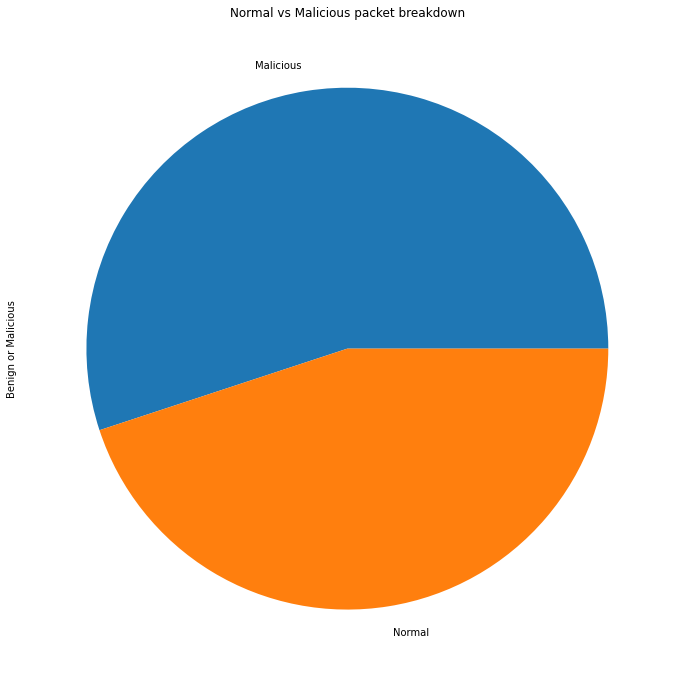

In [11]:
df['label'].value_counts().plot(
    kind='pie',
    title="Normal vs Malicious packet breakdown",
    figsize=(12, 12),
    ylabel='Benign or Malicious',
    labels=['Malicious', 'Normal']
)




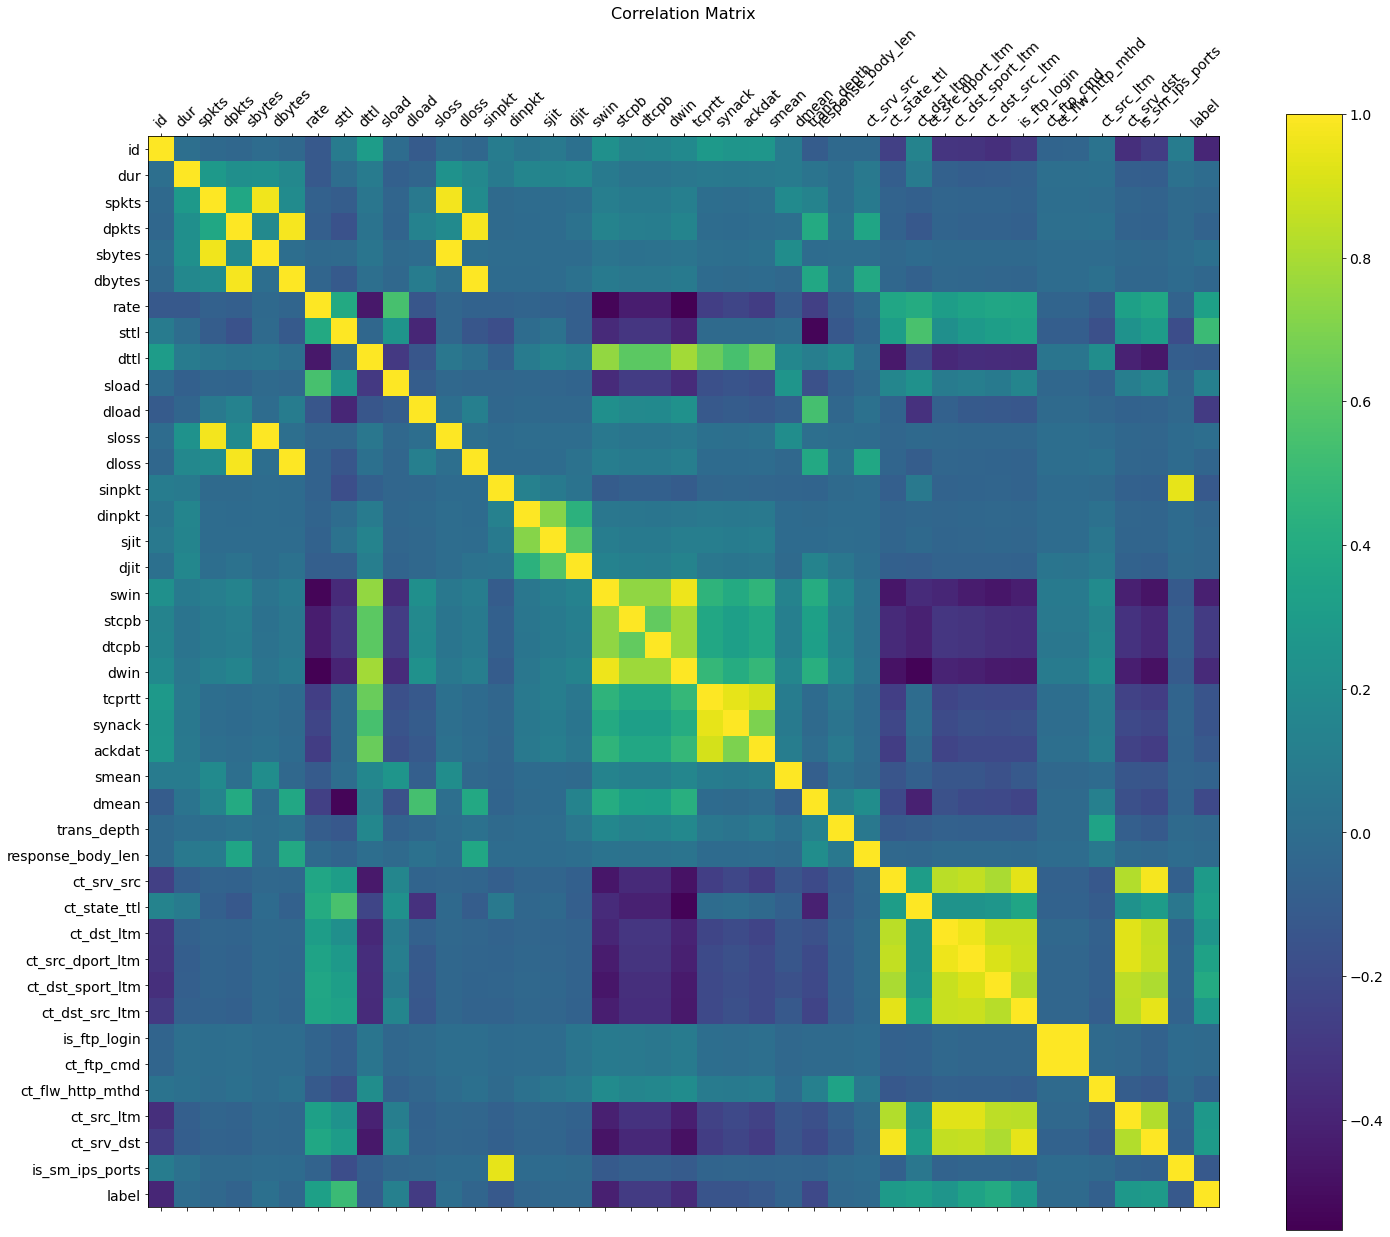

In [12]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(24, 20))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [13]:
df['proto'].value_counts()

tcp           43095
udp           29418
unas           3515
arp             987
ospf            676
              ...  
br-sat-mon       32
pvp              32
wsn              32
ib               31
igmp             30
Name: proto, Length: 131, dtype: int64

In [14]:
df['service'].value_counts()

-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: service, dtype: int64

In [15]:
df['service'] = df['service'].replace('-','none').apply(lambda x: x.strip().lower())



In [16]:
df['state'].value_counts()

FIN    39339
INT    34163
CON     6982
REQ     1842
ACC        4
RST        1
CLO        1
Name: state, dtype: int64

In [17]:
df['attack_cat'].value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

In [18]:
df['is_ftp_login'].value_counts()
df['is_sm_ips_ports'].value_counts()

0    81416
1      916
Name: is_sm_ips_ports, dtype: int64

In [19]:
df['is_ftp_login'] = np.where(df['is_ftp_login'] > 1, 1, df['is_ftp_login'])
df['is_sm_ips_ports'] = np.where(df['is_sm_ips_ports'] > 1, 1, df['is_sm_ips_ports'])

In [20]:
df['ct_flw_http_mthd'].value_counts()


0     74752
1      6908
4       478
9       126
16       32
2        18
12       12
6         6
Name: ct_flw_http_mthd, dtype: int64

In [21]:
# Identify columns with >95% correlation
# Credit: https://medium.com/@subrata.maji16/building-an-intrusion-detection-system-on-unsw-nb15-dataset-based-on-machine-learning-algorithm-16b1600996f5

corr = df.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
columns_to_drop = [col for col in upper.columns if any(upper[col] > 0.95)]
print(columns_to_drop)


['sbytes', 'dbytes', 'sloss', 'dloss', 'dwin', 'ct_src_dport_ltm', 'ct_ftp_cmd', 'ct_srv_dst']


/var/folders/7r/72pw73153fq0wxt3j2p7tklh0000gn/T/ipykernel_5564/3197516954.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


In [22]:
df.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')

In [23]:
# Removing attack_cat for binary classification
df.drop(['attack_cat', 'id'], axis=1, inplace=True, errors='ignore')

In [24]:
df.head()

,dur,proto,service,state,spkts,dpkts,rate,sttl,dttl,sload,...,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,is_sm_ips_ports,label
0,0.000011,udp,none,INT,2,0,90909.0902,254,0,180363632.0,...,2,2,1,1,2,0,0,1,0,0
1,0.000008,udp,none,INT,2,0,125000.0003,254,0,881000000.0,...,2,2,1,1,2,0,0,1,0,0
2,0.000005,udp,none,INT,2,0,200000.0051,254,0,854400000.0,...,3,2,1,1,3,0,0,1,0,0
3,0.000006,udp,none,INT,2,0,166666.6608,254,0,600000000.0,...,3,2,2,1,3,0,0,2,0,0
4,0.000010,udp,none,INT,2,0,100000.0025,254,0,850400000.0,...,3,2,2,1,3,0,0,2,0,0


In [25]:
df.shape

(82332, 35)

In [26]:
num_col = [col for col in df.columns if col not in ['label', 'proto', 'service', 'state']]
num_col

['dur',
 'spkts',
 'dpkts',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'is_sm_ips_ports']

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit(df[num_col])
df[num_col] = scaler.transform(df[num_col])

In [28]:
df.head()

,dur,proto,service,state,spkts,dpkts,rate,sttl,dttl,sload,...,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,is_sm_ips_ports,label
0,1.833334e-07,udp,none,INT,0.000094,0.0,0.090909,0.996078,0.0,0.034238,...,0.016129,0.333333,0.000000,0.0,0.016129,0.0,0.0,0.000000,0.0,0
1,1.333334e-07,udp,none,INT,0.000094,0.0,0.125000,0.996078,0.0,0.167236,...,0.016129,0.333333,0.000000,0.0,0.016129,0.0,0.0,0.000000,0.0,0
2,8.333335e-08,udp,none,INT,0.000094,0.0,0.200000,0.996078,0.0,0.162187,...,0.032258,0.333333,0.000000,0.0,0.032258,0.0,0.0,0.000000,0.0,0
3,1.000000e-07,udp,none,INT,0.000094,0.0,0.166667,0.996078,0.0,0.113895,...,0.032258,0.333333,0.017241,0.0,0.032258,0.0,0.0,0.016949,0.0,0
4,1.666667e-07,udp,none,INT,0.000094,0.0,0.100000,0.996078,0.0,0.161427,...,0.032258,0.333333,0.017241,0.0,0.032258,0.0,0.0,0.016949,0.0,0


In [29]:
cat_col = ['proto', 'service', 'state']
ohe_df = pd.get_dummies(df[cat_col], drop_first = True)
df = pd.concat([df, ohe_df], axis = 1)

In [30]:
df.drop(cat_col, axis=1, inplace=True, errors='ignore')

In [31]:
df.head()

,dur,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,...,service_smtp,service_snmp,service_ssh,service_ssl,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,1.833334e-07,0.000094,0.0,0.090909,0.996078,0.0,0.034238,0.0,1.833028e-07,0.0,...,0,0,0,0,0,0,0,1,0,0
1,1.333334e-07,0.000094,0.0,0.125000,0.996078,0.0,0.167236,0.0,1.333111e-07,0.0,...,0,0,0,0,0,0,0,1,0,0
2,8.333335e-08,0.000094,0.0,0.200000,0.996078,0.0,0.162187,0.0,8.331946e-08,0.0,...,0,0,0,0,0,0,0,1,0,0
3,1.000000e-07,0.000094,0.0,0.166667,0.996078,0.0,0.113895,0.0,9.998335e-08,0.0,...,0,0,0,0,0,0,0,1,0,0
4,1.666667e-07,0.000094,0.0,0.100000,0.996078,0.0,0.161427,0.0,1.666389e-07,0.0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
data_cols = [c for c in df.columns if c != 'label']
label_col = 'label'

In [ ]:
##### SCIKIT LEARN #####

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[data_cols], df['label'], test_size=0.25, random_state=0)

In [34]:
from sklearn.linear_model import LogisticRegression

logitRegr = LogisticRegression()

In [35]:
logitRegr.fit(x_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
logitRegr.predict(x_test.iloc[0].values.reshape(1,-1))

/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [37]:
x_test.iloc[0].values.reshape(1,-1)

array([[5.00000092e-08, 9.39408173e-05, 0.00000000e+00, 3.33333321e-01,
        9.96078431e-01, 0.00000000e+00, 2.27790407e-02, 0.00000000e+00,
        4.99916747e-08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.41891892e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.12903226e-01, 1.00000000e+00,
        3.44827586e-02, 0.00000000e+00, 8.06451613e-02, 0.00000000e+00,
        0.00000000e+00, 5.08474576e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [38]:
score = logitRegr.score(x_test, y_test)
print(score)

0.9119176019044842


In [39]:
predictions = logitRegr.predict(x_test)

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 8453   798]
 [ 1015 10317]]


Text(0.5, 1.0, 'Accuracy Score: 0.9119176019044842')

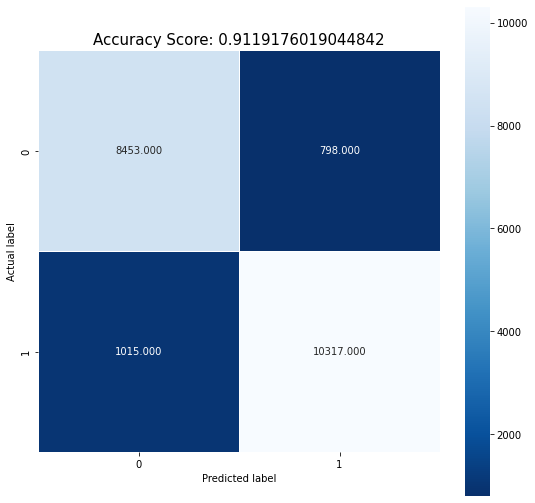

In [41]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

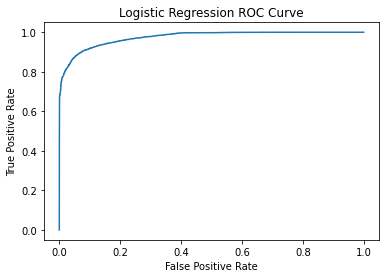

In [42]:
#define metrics
y_pred_proba = logitRegr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [43]:
x_test.shape

(20583, 179)

In [44]:
df.head()

,dur,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,...,service_smtp,service_snmp,service_ssh,service_ssl,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,1.833334e-07,0.000094,0.0,0.090909,0.996078,0.0,0.034238,0.0,1.833028e-07,0.0,...,0,0,0,0,0,0,0,1,0,0
1,1.333334e-07,0.000094,0.0,0.125000,0.996078,0.0,0.167236,0.0,1.333111e-07,0.0,...,0,0,0,0,0,0,0,1,0,0
2,8.333335e-08,0.000094,0.0,0.200000,0.996078,0.0,0.162187,0.0,8.331946e-08,0.0,...,0,0,0,0,0,0,0,1,0,0
3,1.000000e-07,0.000094,0.0,0.166667,0.996078,0.0,0.113895,0.0,9.998335e-08,0.0,...,0,0,0,0,0,0,0,1,0,0
4,1.666667e-07,0.000094,0.0,0.100000,0.996078,0.0,0.161427,0.0,1.666389e-07,0.0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
import autogluon

In [46]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [47]:
df2 = df.drop(['state_CLO', 'state_CON'], axis=1, errors='ignore')

In [48]:
ag_train_data = TabularDataset(df2)

In [49]:
ag_train_data.shape

(82332, 178)

In [50]:
subsample_size = 50000
ag_train_data_sample = ag_train_data.sample(n=subsample_size, random_state=0)
ag_train_data_sample.head()

,dur,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,...,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_FIN,state_INT,state_REQ,state_RST
75179,5.000001e-08,0.000094,0.000000,0.333333,0.996078,0.000000,2.277904e-02,0.000000,4.999167e-08,0.000000,...,0,0,0,0,0,0,0,0,1,0
20654,6.666668e-08,0.000094,0.000000,0.250000,0.996078,0.000000,2.164009e-02,0.000000,6.665557e-08,0.000000,...,0,0,0,0,0,0,0,1,0,0
56735,1.166667e-07,0.000094,0.000000,0.166667,0.996078,0.000000,2.531005e-02,0.000000,9.998335e-08,0.000000,...,0,0,0,0,0,0,0,1,0,0
48735,4.758384e-03,0.000845,0.000545,0.000053,0.996078,0.996047,4.196725e-06,0.000301,5.067952e-04,0.000883,...,0,0,0,0,0,0,1,0,0,0
54791,3.448679e-02,0.000658,0.000726,0.000007,0.243137,0.996047,2.341159e-07,0.000256,4.925863e-03,0.004827,...,0,0,0,0,0,0,1,0,0,0


In [51]:
label = 'label'
print("Summary of class variable: \n", ag_train_data_sample[label].describe())

Summary of class variable: 
 count    50000.000000
mean         0.550600
std          0.497438
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: label, dtype: float64


In [52]:
##### AUTOGLUON #####

# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [53]:
##### MAY NEED TO RUN THE FOLLOWING IF YOUR KERNEL DIES IN THE STEP BELOW #####

# Uninstall libomp if it was previous installed
# brew uninstall -f libomp
# wget https://raw.githubusercontent.com/Homebrew/homebrew-core/fb8323f2b170bd4ae97e1bac9bf3e2983af3fdb0/Formula/libomp.rb
# brew install libomp.rb
# rm libomp.rb

In [54]:
save_path = 'models'  # specifies folder to store trained models
predictor = TabularPredictor(label=label, path=save_path).fit(ag_train_data_sample)

Beginning AutoGluon training ...
AutoGluon will save models to "models/"
AutoGluon Version:  0.6.0
Python Version:     3.9.16
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 21.4.0: Fri Mar 18 00:45:05 PDT 2022; root:xnu-8020.101.4~15/RELEASE_X86_64
Train Data Rows:    50000
Train Data Columns: 177
Label Column: label
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6581.39 MB
	Train Data (Original)  Memory Usage: 19.7 MB (0.3% of available memor

[1000]	valid_set's binary_error: 0.0296


	0.9712	 = Validation score   (accuracy)
	3.08s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: LightGBM ...
	0.9764	 = Validation score   (accuracy)
	1.07s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.9672	 = Validation score   (accuracy)
	4.77s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.9684	 = Validation score   (accuracy)
	4.75s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: CatBoost ...
	0.9716	 = Validation score   (accuracy)
	4.41s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.9652	 = Validation score   (accuracy)
	6.53s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.9664	 = Validation score   (accuracy)
	6.84s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	0.9684	 = Validation score   (accuracy)
	51.03s	 = Training   runtime
	0.12

In [55]:
df_test = pd.read_csv('data/UNSW_NB15_testing-set.csv')

In [56]:
df_test.shape

(175341, 45)

In [57]:
df_test = df_test.sample(50000)

In [58]:
df_test['service'] = df_test['service'].replace('-','none').apply(lambda x: x.strip().lower())
df_test.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')
df_test.drop(['attack_cat', 'id'], axis=1, inplace=True, errors='ignore')

df_test[num_col] = scaler.transform(df_test[num_col])

ohe_df = pd.get_dummies(df_test[cat_col], drop_first = True)
df_test = pd.concat([df_test, ohe_df], axis = 1)

df_test.drop(cat_col, axis=1, inplace=True, errors='ignore')

In [59]:
df_test.shape

(50000, 181)

In [60]:
df.shape

(82332, 180)

In [61]:
[col for col in df_test.columns if col not in df2.columns]

['proto_icmp', 'state_ECO', 'state_no']

In [62]:
[col for col in df2.columns if col not in df_test.columns]

[]

In [63]:
ag_test_data = TabularDataset(df_test)

In [64]:
predictor.leaderboard(ag_test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestGini,0.90590,0.9672,0.486586,0.086307,4.768239,0.486586,0.086307,4.768239,1,True,5
1,RandomForestEntr,0.90516,0.9684,0.433951,0.084006,4.751224,0.433951,0.084006,4.751224,1,True,6
2,LightGBMXT,0.90374,0.9712,0.512637,0.036896,3.079114,0.512637,0.036896,3.079114,1,True,3
3,CatBoost,0.90358,0.9716,0.047749,0.009294,4.407628,0.047749,0.009294,4.407628,1,True,7
4,XGBoost,0.90260,0.9764,0.242031,0.027700,2.249927,0.242031,0.027700,2.249927,1,True,11
5,LightGBM,0.90132,0.9764,0.139650,0.018882,1.073287,0.139650,0.018882,1.073287,1,True,4
6,LightGBMLarge,0.90072,0.9792,0.164293,0.020238,1.919514,0.164293,0.020238,1.919514,1,True,13
7,WeightedEnsemble_L2,0.90044,0.9804,64.903905,3.401199,5.548538,0.008056,0.004531,1.306200,2,True,14
8,ExtraTreesEntr,0.89824,0.9664,0.653786,0.089848,6.842812,0.653786,0.089848,6.842812,1,True,9
9,ExtraTreesGini,0.89780,0.9652,0.622035,0.091176,6.527146,0.622035,0.091176,6.527146,1,True,8


In [65]:
x_test2 = df_test[[col for col in df_test.columns if col not in ['label', 'proto_icmp', 'state_ECO', 'state_no']]]
y_test2 = df_test['label']

In [66]:
# score = logitRegr.score(x_test2, y_test2)
# print(score)

In [67]:
x_test['state_CLO'].value_counts()

0    20583
Name: state_CLO, dtype: int64

In [68]:
x_test['state_CON'].value_counts()

0    18849
1     1734
Name: state_CON, dtype: int64

In [69]:
x_test2 = x_test2.copy()

In [70]:
x_test2.loc[:, 'state_CLO'] = 0
x_test2.loc[:, 'state_CON'] = 0
x_test2

,dur,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,...,service_smtp,service_snmp,service_ssh,service_ssl,state_FIN,state_INT,state_REQ,state_RST,state_CLO,state_CON
87395,1.928715e-02,0.000845,0.000726,0.000015,0.996078,0.996047,1.141679e-06,0.000103,2.038527e-03,2.661040e-03,...,0,0,0,0,1,0,0,0,0,0
171525,6.666668e-08,0.000094,0.000000,0.250000,0.996078,0.000000,2.164009e-02,0.000000,6.665557e-08,0.000000e+00,...,0,0,0,0,0,1,0,0,0,0
100997,3.536851e-03,0.000470,0.000182,0.000033,0.243137,0.996047,5.882313e-06,0.000078,7.072522e-04,1.212347e-07,...,0,0,0,0,0,0,0,0,0,0
106304,1.500000e-07,0.000094,0.000000,0.111111,0.996078,0.000000,1.687336e-02,0.000000,1.499750e-07,0.000000e+00,...,0,0,0,0,0,1,0,0,0,0
170606,1.929705e-02,0.000845,0.000726,0.000015,0.996078,0.996047,6.216993e-07,0.000103,2.096019e-03,2.603743e-03,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51303,9.070118e-03,0.000845,0.000545,0.000028,0.996078,0.996047,4.651743e-06,0.000158,1.007623e-03,1.645917e-03,...,0,0,0,0,1,0,0,0,0,0
10178,7.200001e-05,0.001973,0.001271,0.008102,0.121569,0.114625,4.935459e-04,0.142750,3.427996e-06,4.869375e-06,...,0,0,0,0,1,0,0,0,0,0
62266,6.666668e-08,0.000094,0.000000,0.250000,0.996078,0.000000,3.189066e-02,0.000000,6.665557e-08,0.000000e+00,...,0,0,0,0,0,1,0,0,0,0
70760,8.333335e-08,0.000094,0.000000,0.200000,0.996078,0.000000,3.037206e-02,0.000000,8.331946e-08,0.000000e+00,...,0,0,0,0,0,1,0,0,0,0


In [71]:
score = logitRegr.score(x_test2, y_test2)
print(score)

0.44106


/usr/local/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [72]:
df_test_original = pd.read_csv('data/UNSW_NB15_testing-set.csv')

<AxesSubplot:title={'center':'Normal vs Malicious packet breakdown'}, ylabel='Benign or Malicious'>

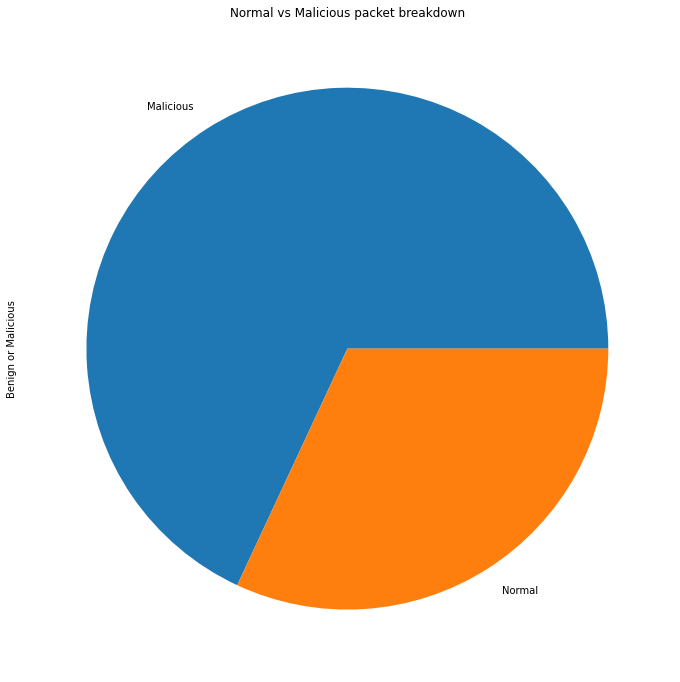

In [73]:
df_test_original['label'].value_counts().plot(
    kind='pie',
    title="Normal vs Malicious packet breakdown",
    figsize=(12, 12),
    ylabel='Benign or Malicious',
    labels=['Malicious', 'Normal']
)


<AxesSubplot:title={'center':'Number of attacks by category'}>

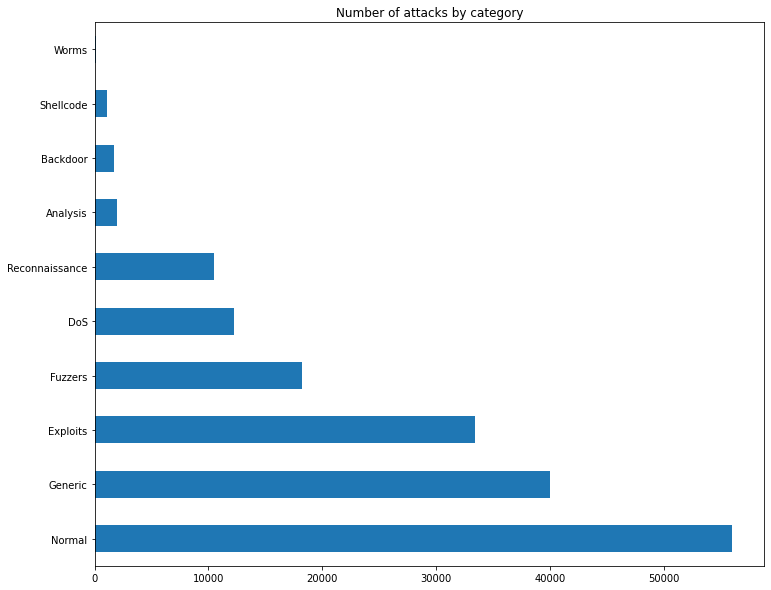

In [74]:
df_test_original['attack_cat'].value_counts().plot(kind='barh', title='Number of attacks by category', figsize=(12, 10))


In [75]:
df_test.size

9050000

In [80]:
predictor.info().get('model_info').get('NeuralNetFastAI')

{'name': 'NeuralNetFastAI',
 'model_type': 'NNFastAiTabularModel',
 'problem_type': 'binary',
 'eval_metric': 'accuracy',
 'stopping_metric': 'accuracy',
 'fit_time': 51.032535791397095,
 'num_classes': 2,
 'quantile_levels': None,
 'predict_time': 0.1150362491607666,
 'val_score': 0.9684,
 'hyperparameters': {'layers': None,
  'emb_drop': 0.1,
  'ps': 0.1,
  'bs': 'auto',
  'lr': 0.01,
  'epochs': 'auto',
  'early.stopping.min_delta': 0.0001,
  'early.stopping.patience': 20,
  'smoothing': 0.0},
 'hyperparameters_fit': {'epochs': 30, 'best_epoch': 26},
 'hyperparameters_nondefault': [],
 'ag_args_fit': {'max_memory_usage_ratio': 1.0,
  'max_time_limit_ratio': 1.0,
  'max_time_limit': None,
  'min_time_limit': 0,
  'valid_raw_types': ['bool', 'int', 'float', 'category'],
  'valid_special_types': None,
  'ignored_type_group_special': ['text_ngram', 'text_as_category'],
  'ignored_type_group_raw': None,
  'get_features_kwargs': None,
  'get_features_kwargs_extra': None,
  'predict_1_batc

In [81]:
predictor.info().get('model_info').get('NeuralNetTorch')

{'name': 'NeuralNetTorch',
 'model_type': 'TabularNeuralNetTorchModel',
 'problem_type': 'binary',
 'eval_metric': 'accuracy',
 'stopping_metric': 'accuracy',
 'fit_time': 100.40381526947021,
 'num_classes': 2,
 'quantile_levels': None,
 'predict_time': 0.06641578674316406,
 'val_score': 0.97,
 'hyperparameters': {'num_epochs': 500,
  'epochs_wo_improve': 20,
  'activation': 'relu',
  'embedding_size_factor': 1.0,
  'embed_exponent': 0.56,
  'max_embedding_dim': 100,
  'y_range': None,
  'y_range_extend': 0.05,
  'dropout_prob': 0.1,
  'optimizer': 'adam',
  'learning_rate': 0.0003,
  'weight_decay': 1e-06,
  'proc.embed_min_categories': 4,
  'proc.impute_strategy': 'median',
  'proc.max_category_levels': 100,
  'proc.skew_threshold': 0.99,
  'use_ngram_features': False,
  'num_layers': 4,
  'hidden_size': 128,
  'max_batch_size': 512,
  'use_batchnorm': False,
  'loss_function': 'auto'},
 'hyperparameters_fit': {'batch_size': 128, 'num_epochs': 40},
 'hyperparameters_nondefault': [],


In [82]:
hyperparameters = {
   'NN': {'num_epochs': 500},
   'CAT': {'iterations': 10000},
   'RF': {'n_estimators': 300},
   'XT': {'n_estimators': 300},
   'KNN': {},
}

In [83]:
save_path = 'models2'  # specifies folder to store trained models
predictor_tuned = TabularPredictor(label=label).fit(ag_train_data_sample, hyperparameters=hyperparameters)

No path specified. Models will be saved in: "AutogluonModels/ag-20230319_194201/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230319_194201/"
AutoGluon Version:  0.6.0
Python Version:     3.9.16
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 21.4.0: Fri Mar 18 00:45:05 PDT 2022; root:xnu-8020.101.4~15/RELEASE_X86_64
Train Data Rows:    50000
Train Data Columns: 177
Label Column: label
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Availabl

In [84]:
predictor_tuned.info().get('model_info').get('NeuralNetTorch')

In [85]:
predictor_tuned.leaderboard(ag_test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForest,0.90590,0.9672,0.457868,0.084075,5.042398,0.457868,0.084075,5.042398,1,True,2
1,CatBoost,0.90358,0.9716,0.035362,0.009676,4.098829,0.035362,0.009676,4.098829,1,True,3
2,WeightedEnsemble_L2,0.90250,0.9736,68.110120,3.568715,16.510648,0.019587,0.003511,0.335121,2,True,5
3,ExtraTrees,0.89780,0.9652,0.618705,0.087515,6.984007,0.618705,0.087515,6.984007,1,True,4
4,KNeighbors,0.86836,0.9260,66.978598,3.383938,0.050293,66.978598,3.383938,0.050293,1,True,1


In [76]:
##### KERAS #####

# The following models are guided by work done from a Kaggle contributor here: https://www.kaggle.com/code/carlkirstein/unsw-nb15-modelling-97-7

# The models were used for baseline accuracy and the architecture experimented with in an attempt to reach higher accuracy


In [77]:
#Import libraries that will allow you to use keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from keras import metrics
# import keras_metrics as km #when compiling
import keras
import numpy as np
from numpy import array

2023-03-19 15:41:47.615583: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [78]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [79]:
import time
x_train.head()

,dur,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,...,service_smtp,service_snmp,service_ssh,service_ssl,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
53696,1.094269e-02,0.001033,0.000726,0.000029,0.996078,0.996047,2.213508e-06,0.000390,5.442225e-02,0.084804,...,0,0,0,0,0,0,1,0,0,0
51492,3.333334e-08,0.000094,0.000000,0.500000,0.996078,0.000000,4.328018e-02,0.000000,3.332778e-08,0.000000,...,0,0,0,0,0,0,0,1,0,0
43528,1.333334e-07,0.000094,0.000000,0.125000,0.996078,0.000000,7.403189e-03,0.000000,1.333111e-07,0.000000,...,0,0,0,0,0,0,0,1,0,0
10146,5.000001e-08,0.000094,0.000000,0.333333,0.996078,0.000000,4.252088e-02,0.000000,4.999167e-08,0.000000,...,0,0,0,0,0,0,0,1,0,0
2129,3.857261e-02,0.001033,0.000908,0.000009,0.996078,0.996047,6.679774e-07,0.000123,3.421389e-03,0.004253,...,0,0,0,0,0,0,1,0,0,0


In [86]:
def worker(test_dataset, model, model_name, start, end_train):
    try:
        test_x, test_y, mp = test_dataset
        loss, accuracy, f1s, precision, recall = model.evaluate(test_x, test_y)
        end_predict = time.time()
        mp.loc[model_name] = [accuracy, accuracy, accuracy, accuracy,end_train-start,end_predict-end_train,end_predict-start]
    except Exception as e:
        print(f"error with item: {e}")
        
        
        

In [87]:
def worker2(test_dataset, model, model_name, start, end_train):
    try:
        test_x, test_y, mp = test_dataset
        loss, accuracy = model.evaluate(test_x, test_y)
        end_predict = time.time()
        mp.loc[model_name] = [accuracy, accuracy, accuracy, accuracy,end_train-start,end_predict-end_train,end_predict-start]
    except Exception as e:
        print(f"error with item: {e}")

In [88]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

model_performance2 = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

from multiprocessing.pool import ThreadPool as Pool
# from multiprocessing import Pool

pool_size = 5  # your "parallelness"

pool = Pool(pool_size)



In [89]:
#Build the feed forward neural network model
def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=179, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='softmax')) #for multiclass classification
    #Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy',f1_m,precision_m, recall_m]
                 )
    return model

#institate the model
model = build_model()

#fit the model
start = time.time()
model.fit(x_train, y_train, epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

test_datasets = [(x_test, y_test, model_performance), (x_test2, y_test2, model_performance2)]

for test_dataset in test_datasets:
    pool.apply_async(worker, (test_dataset, model, 'MLP (Keras)', start, end_train,))


2023-03-19 15:43:59.103572: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/200
31/31 - 1s - loss: 2.8469 - accuracy: 0.3313 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - 912ms/epoch - 29ms/step
Epoch 2/200
31/31 - 0s - loss: 2.2281 - accuracy: 0.4500 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - 94ms/epoch - 3ms/step
Epoch 3/200
31/31 - 0s - loss: 1.1143 - accuracy: 0.5096 - f1_m: 0.1986 - precision_m: 0.2886 - recall_m: 0.1759 - 94ms/epoch - 3ms/step
Epoch 4/200
31/31 - 0s - loss: 0.6381 - accuracy: 0.7126 - f1_m: 0.7317 - precision_m: 0.6169 - recall_m: 0.9129 - 87ms/epoch - 3ms/step
Epoch 5/200
31/31 - 0s - loss: 0.5235 - accuracy: 0.7373 - f1_m: 0.7109 - precision_m: 0.5522 - recall_m: 0.9977 - 92ms/epoch - 3ms/step
Epoch 6/200
31/31 - 0s - loss: 0.4472 - accuracy: 0.7722 - f1_m: 0.7155 - precision_m: 0.5583 - recall_m: 0.9960 - 92ms/epoch - 3ms/step
Epoch 7/200
31/31 - 0s - loss: 0.3777 - accuracy: 0.8205 - f1_m: 0.7097 - precision_m: 0.5509 - recall_m: 0.9976 - 96ms/epoch - 3ms/step
Epoch 8/200
31/

Epoch 61/200
31/31 - 0s - loss: 0.1571 - accuracy: 0.9389 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 0.9999 - 89ms/epoch - 3ms/step
Epoch 62/200
31/31 - 0s - loss: 0.1562 - accuracy: 0.9398 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 84ms/epoch - 3ms/step
Epoch 63/200
31/31 - 0s - loss: 0.1553 - accuracy: 0.9407 - f1_m: 0.7101 - precision_m: 0.5507 - recall_m: 1.0000 - 83ms/epoch - 3ms/step
Epoch 64/200
31/31 - 0s - loss: 0.1543 - accuracy: 0.9416 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 0.9999 - 85ms/epoch - 3ms/step
Epoch 65/200
31/31 - 0s - loss: 0.1542 - accuracy: 0.9406 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 83ms/epoch - 3ms/step
Epoch 66/200
31/31 - 0s - loss: 0.1528 - accuracy: 0.9419 - f1_m: 0.7102 - precision_m: 0.5507 - recall_m: 1.0000 - 88ms/epoch - 3ms/step
Epoch 67/200
31/31 - 0s - loss: 0.1518 - accuracy: 0.9421 - f1_m: 0.7102 - precision_m: 0.5507 - recall_m: 1.0000 - 91ms/epoch - 3ms/step
Epoch 68/200
31/31 - 0s - loss: 0.

Epoch 121/200
31/31 - 0s - loss: 0.1341 - accuracy: 0.9501 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 80ms/epoch - 3ms/step
Epoch 122/200
31/31 - 0s - loss: 0.1338 - accuracy: 0.9500 - f1_m: 0.7101 - precision_m: 0.5505 - recall_m: 1.0000 - 81ms/epoch - 3ms/step
Epoch 123/200
31/31 - 0s - loss: 0.1335 - accuracy: 0.9498 - f1_m: 0.7101 - precision_m: 0.5505 - recall_m: 1.0000 - 81ms/epoch - 3ms/step
Epoch 124/200
31/31 - 0s - loss: 0.1335 - accuracy: 0.9497 - f1_m: 0.7100 - precision_m: 0.5505 - recall_m: 1.0000 - 82ms/epoch - 3ms/step
Epoch 125/200
31/31 - 0s - loss: 0.1333 - accuracy: 0.9498 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 81ms/epoch - 3ms/step
Epoch 126/200
31/31 - 0s - loss: 0.1331 - accuracy: 0.9499 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 80ms/epoch - 3ms/step
Epoch 127/200
31/31 - 0s - loss: 0.1327 - accuracy: 0.9503 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 80ms/epoch - 3ms/step
Epoch 128/200
31/31 - 0s - 

Epoch 180/200
31/31 - 0s - loss: 0.1263 - accuracy: 0.9501 - f1_m: 0.7102 - precision_m: 0.5506 - recall_m: 1.0000 - 89ms/epoch - 3ms/step
Epoch 181/200
31/31 - 0s - loss: 0.1265 - accuracy: 0.9501 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 95ms/epoch - 3ms/step
Epoch 182/200
31/31 - 0s - loss: 0.1266 - accuracy: 0.9503 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 99ms/epoch - 3ms/step
Epoch 183/200
31/31 - 0s - loss: 0.1267 - accuracy: 0.9494 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 95ms/epoch - 3ms/step
Epoch 184/200
31/31 - 0s - loss: 0.1262 - accuracy: 0.9499 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 95ms/epoch - 3ms/step
Epoch 185/200
31/31 - 0s - loss: 0.1260 - accuracy: 0.9503 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 95ms/epoch - 3ms/step
Epoch 186/200
31/31 - 0s - loss: 0.1264 - accuracy: 0.9498 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 95ms/epoch - 3ms/step
Epoch 187/200
31/31 - 0s - 

In [90]:
model_performance

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time


In [91]:
#Build the neural network model
def build_model():
    model = Sequential()
    model.add(GRU(20, return_sequences=True,input_shape=(1,179)))
    model.add(GRU(20, return_sequences=True))
    model.add(Dense(10, activation='softmax')) #for multiclass classification
    #Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  # metrics=['accuracy',f1_m,precision_m, recall_m]
                  metrics=['accuracy']
                 )
    return model

#The GRU input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and features.
#reshape input data
X_train_array = array(x_train) #array has been declared in the previous cell
print(len(X_train_array))
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0],1,179)

#reshape output data
X_test_array=  array(x_test)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0],1,179) 

X_test2_array=  array(x_test2)
X_test2_reshaped = X_test2_array.reshape(X_test2_array.shape[0],1,179) 


#institate the model
model = build_model()

start = time.time()
#fit the model
model.fit(X_train_reshaped, y_train, epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

test_datasets = [(X_test_reshaped, y_test, model_performance), (X_test2_reshaped, y_test2, model_performance2)]

for test_dataset in test_datasets:
    pool.apply_async(worker2, (test_dataset, model, 'GRU (Keras)', start, end_train,))

61749
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5152 - accuracy: 0.8931 - f1_m: 0.7783 - precision_m: 0.6435 - recall_m: 1.0000
31/31 - 5s - loss: 2.1384 - accuracy: 0.5438 - 5s/epoch - 146ms/step
Epoch 2/200
31/31 - 0s - loss: 1.5452 - accuracy: 0.7441 - 219ms/epoch - 7ms/step
Epoch 3/200
31/31 - 0s - loss: 0.8484 - accuracy: 0.7391 - 231ms/epoch - 7ms/step
Epoch 4/200
31/31 - 0s - loss: 0.5954 - accuracy: 0.7310 - 214ms/epoch - 7ms/step
Epoch 5/200
31/31 - 0s - loss: 0.5034 - accuracy: 0.7788 - 207ms/epoch - 7ms/step
Epoch 6/200
31/31 - 0s - loss: 0.4371 - accuracy: 0.8023 - 231ms/epoch - 7ms/step
Epoch 7/200
31/31 - 0s - loss: 0.3849 - accuracy: 0.8183 - 232ms/epoch - 7ms/step
Epoch 8/200
31/31 - 0s - loss: 0.3471 - accuracy: 0.8251 - 228ms/epoch - 7ms/step
Epoch 9/200
31/31 - 0s - loss: 0.3203 - accuracy: 0.8377 - 204ms/epoch - 7ms/step
Epoch 10/200
31/31 - 0s - loss: 0.3010 - accuracy: 0.8423 - 236ms/epoch - 8ms/step
Epoch 11/200
31/31 - 0s - loss: 0.2859 

Epoch 95/200
31/31 - 0s - loss: 0.1421 - accuracy: 0.9464 - 202ms/epoch - 7ms/step
Epoch 96/200
31/31 - 0s - loss: 0.1416 - accuracy: 0.9466 - 210ms/epoch - 7ms/step
Epoch 97/200
31/31 - 0s - loss: 0.1414 - accuracy: 0.9471 - 191ms/epoch - 6ms/step
Epoch 98/200
31/31 - 0s - loss: 0.1414 - accuracy: 0.9469 - 192ms/epoch - 6ms/step
Epoch 99/200
31/31 - 0s - loss: 0.1409 - accuracy: 0.9472 - 202ms/epoch - 7ms/step
Epoch 100/200
31/31 - 0s - loss: 0.1411 - accuracy: 0.9466 - 217ms/epoch - 7ms/step
Epoch 101/200
31/31 - 0s - loss: 0.1411 - accuracy: 0.9472 - 201ms/epoch - 6ms/step
Epoch 102/200
31/31 - 0s - loss: 0.1410 - accuracy: 0.9468 - 202ms/epoch - 7ms/step
Epoch 103/200
31/31 - 0s - loss: 0.1402 - accuracy: 0.9473 - 192ms/epoch - 6ms/step
Epoch 104/200
31/31 - 0s - loss: 0.1403 - accuracy: 0.9472 - 191ms/epoch - 6ms/step
Epoch 105/200
31/31 - 0s - loss: 0.1401 - accuracy: 0.9470 - 198ms/epoch - 6ms/step
Epoch 106/200
31/31 - 0s - loss: 0.1405 - accuracy: 0.9467 - 200ms/epoch - 6ms/st

Epoch 193/200
31/31 - 0s - loss: 0.1272 - accuracy: 0.9502 - 222ms/epoch - 7ms/step
Epoch 194/200
31/31 - 0s - loss: 0.1270 - accuracy: 0.9504 - 257ms/epoch - 8ms/step
Epoch 195/200
31/31 - 0s - loss: 0.1272 - accuracy: 0.9505 - 227ms/epoch - 7ms/step
Epoch 196/200
31/31 - 0s - loss: 0.1268 - accuracy: 0.9508 - 227ms/epoch - 7ms/step
Epoch 197/200
31/31 - 0s - loss: 0.1274 - accuracy: 0.9500 - 218ms/epoch - 7ms/step
Epoch 198/200
31/31 - 0s - loss: 0.1267 - accuracy: 0.9506 - 246ms/epoch - 8ms/step
Epoch 199/200
31/31 - 0s - loss: 0.1266 - accuracy: 0.9501 - 231ms/epoch - 7ms/step
Epoch 200/200
31/31 - 0s - loss: 0.1263 - accuracy: 0.9500 - 203ms/epoch - 7ms/step


In [92]:
model_performance

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
MLP (Keras),0.907552,0.907552,0.907552,0.907552,18.882801,2.078473,20.961274


In [93]:
# LSTM

def build_model():
    model = Sequential()
    model.add(LSTM(20, return_sequences=True,input_shape=(1,179)))
    model.add(LSTM(20, return_sequences=True))
    model.add(Dense(10, activation='softmax')) #for multiclass classification
    #Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  # metrics=['accuracy',f1_m,precision_m, recall_m]
                  metrics=['accuracy']
                 )
    return model

#The LSTM input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and features.
#reshape input data
X_train_array = array(x_train) #array has been declared in the previous cell
print(len(X_train_array))
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0],1,179)

#reshape output data
X_test_array=  array(x_test)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0],1,179) 

X_test2_array=  array(x_test2)
X_test2_reshaped = X_test2_array.reshape(X_test2_array.shape[0],1,179) 


#institate the model
model = build_model()


#fit the model
start = time.time()
model.fit(X_train_reshaped, y_train, epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

test_datasets = [(X_test_reshaped, y_test, model_performance), (X_test2_reshaped, y_test2, model_performance2)]

for test_dataset in test_datasets:
    pool.apply_async(worker2, (test_dataset, model, 'LSTM (Keras)', start, end_train,))


61749
Epoch 1/200
1563/1563 [==============================] - 5s 2ms/step - loss: 0.2800 - accuracy: 0.9141
31/31 - 5s - loss: 2.2312 - accuracy: 0.4971 - 5s/epoch - 155ms/step
Epoch 2/200
31/31 - 0s - loss: 1.9249 - accuracy: 0.5506 - 211ms/epoch - 7ms/step
Epoch 3/200
31/31 - 0s - loss: 1.2377 - accuracy: 0.5506 - 199ms/epoch - 6ms/step
Epoch 4/200
31/31 - 0s - loss: 0.8155 - accuracy: 0.5506 - 203ms/epoch - 7ms/step
Epoch 5/200
31/31 - 0s - loss: 0.7271 - accuracy: 0.5506 - 208ms/epoch - 7ms/step
Epoch 6/200
31/31 - 0s - loss: 0.7004 - accuracy: 0.5506 - 199ms/epoch - 6ms/step
Epoch 7/200
31/31 - 0s - loss: 0.6794 - accuracy: 0.5524 - 203ms/epoch - 7ms/step
Epoch 8/200
31/31 - 0s - loss: 0.6488 - accuracy: 0.6411 - 204ms/epoch - 7ms/step
Epoch 9/200
31/31 - 0s - loss: 0.5991 - accuracy: 0.7311 - 215ms/epoch - 7ms/step
Epoch 10/200
31/31 - 0s - loss: 0.5394 - accuracy: 0.7367 - 203ms/epoch - 7ms/step
Epoch 11/200
31/31 - 0s - loss: 0.4846 - accuracy: 0.7864 - 204ms/epoch - 7ms/step


Epoch 98/200
31/31 - 0s - loss: 0.1420 - accuracy: 0.9466 - 216ms/epoch - 7ms/step
Epoch 99/200
31/31 - 0s - loss: 0.1423 - accuracy: 0.9464 - 213ms/epoch - 7ms/step
Epoch 100/200
31/31 - 0s - loss: 0.1421 - accuracy: 0.9459 - 214ms/epoch - 7ms/step
Epoch 101/200
31/31 - 0s - loss: 0.1420 - accuracy: 0.9473 - 265ms/epoch - 9ms/step
Epoch 102/200
31/31 - 0s - loss: 0.1422 - accuracy: 0.9460 - 217ms/epoch - 7ms/step
Epoch 103/200
31/31 - 0s - loss: 0.1415 - accuracy: 0.9473 - 214ms/epoch - 7ms/step
Epoch 104/200
31/31 - 0s - loss: 0.1408 - accuracy: 0.9468 - 216ms/epoch - 7ms/step
Epoch 105/200
31/31 - 0s - loss: 0.1409 - accuracy: 0.9475 - 215ms/epoch - 7ms/step
Epoch 106/200
31/31 - 0s - loss: 0.1407 - accuracy: 0.9467 - 215ms/epoch - 7ms/step
Epoch 107/200
31/31 - 0s - loss: 0.1407 - accuracy: 0.9468 - 219ms/epoch - 7ms/step
Epoch 108/200
31/31 - 0s - loss: 0.1405 - accuracy: 0.9474 - 214ms/epoch - 7ms/step
Epoch 109/200
31/31 - 0s - loss: 0.1401 - accuracy: 0.9477 - 216ms/epoch - 7ms

Epoch 196/200
31/31 - 0s - loss: 0.1285 - accuracy: 0.9515 - 214ms/epoch - 7ms/step
Epoch 197/200
31/31 - 0s - loss: 0.1286 - accuracy: 0.9509 - 219ms/epoch - 7ms/step
Epoch 198/200
31/31 - 0s - loss: 0.1285 - accuracy: 0.9518 - 230ms/epoch - 7ms/step
Epoch 199/200
31/31 - 0s - loss: 0.1286 - accuracy: 0.9511 - 226ms/epoch - 7ms/step
Epoch 200/200
31/31 - 0s - loss: 0.1283 - accuracy: 0.9512 - 215ms/epoch - 7ms/step


In [94]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
MLP (Keras),90.76%,90.76%,90.76%,90.76%,18.9,2.1,21.0
GRU (Keras),92.39%,92.39%,92.39%,92.39%,46.9,3.1,50.0


In [95]:
#Build the feed forward neural network model
def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=179, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='softmax')) #for multiclass classification
    #Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy',f1_m,precision_m, recall_m]
                 )
    return model

#institate the model
model = build_model()

#fit the model
start = time.time()
model.fit(x_train, y_train, epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

test_datasets = [(x_test, y_test, model_performance), (x_test2, y_test2, model_performance2)]


for test_dataset in test_datasets:
    pool.apply_async(worker, (test_dataset, model, 'MLP 3 layers (Keras)', start, end_train,))


Epoch 1/200
 348/1563 [=====>........................] - ETA: 2s - loss: 0.2995 - accuracy: 0.923931/31 - 0s - loss: 1.7957 - accuracy: 0.5506 - f1_m: 0.1712 - precision_m: 0.4247 - recall_m: 0.1402 - 142ms/epoch - 5ms/step
Epoch 3/200
 418/1563 [=======>......................] - ETA: 2s - loss: 0.2983 - accuracy: 0.923931/31 - 0s - loss: 0.7805 - accuracy: 0.6017 - f1_m: 0.7445 - precision_m: 0.6265 - recall_m: 0.9378 - 138ms/epoch - 4ms/step
Epoch 4/200
 483/1563 [========>.....................] - ETA: 2s - loss: 0.2987 - accuracy: 0.924231/31 - 0s - loss: 0.5341 - accuracy: 0.7695 - f1_m: 0.7239 - precision_m: 0.5678 - recall_m: 0.9991 - 149ms/epoch - 5ms/step
Epoch 5/200
 558/1563 [=========>....................] - ETA: 2s - loss: 0.2986 - accuracy: 0.924131/31 - 0s - loss: 0.4686 - accuracy: 0.7806 - f1_m: 0.7095 - precision_m: 0.5504 - recall_m: 0.9984 - 161ms/epoch - 5ms/step
Epoch 6/200
 624/1563 [==========>...................] - ETA: 2s - loss: 0.3010 - accuracy: 0.923931/31 

Epoch 44/200
31/31 - 0s - loss: 0.1453 - accuracy: 0.9440 - f1_m: 0.7102 - precision_m: 0.5507 - recall_m: 1.0000 - 95ms/epoch - 3ms/step
Epoch 45/200
31/31 - 0s - loss: 0.1449 - accuracy: 0.9449 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 95ms/epoch - 3ms/step
Epoch 46/200
31/31 - 0s - loss: 0.1453 - accuracy: 0.9439 - f1_m: 0.7102 - precision_m: 0.5507 - recall_m: 1.0000 - 95ms/epoch - 3ms/step
Epoch 47/200
31/31 - 0s - loss: 0.1440 - accuracy: 0.9450 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 94ms/epoch - 3ms/step
Epoch 48/200
31/31 - 0s - loss: 0.1437 - accuracy: 0.9451 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 0.9999 - 95ms/epoch - 3ms/step
Epoch 49/200
31/31 - 0s - loss: 0.1435 - accuracy: 0.9452 - f1_m: 0.7101 - precision_m: 0.5507 - recall_m: 1.0000 - 94ms/epoch - 3ms/step
Epoch 50/200
31/31 - 0s - loss: 0.1443 - accuracy: 0.9440 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 100ms/epoch - 3ms/step
Epoch 51/200
31/31 - 0s - loss: 0

Epoch 104/200
31/31 - 0s - loss: 0.1244 - accuracy: 0.9511 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 106ms/epoch - 3ms/step
Epoch 105/200
31/31 - 0s - loss: 0.1253 - accuracy: 0.9505 - f1_m: 0.7102 - precision_m: 0.5507 - recall_m: 1.0000 - 100ms/epoch - 3ms/step
Epoch 106/200
31/31 - 0s - loss: 0.1243 - accuracy: 0.9512 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 98ms/epoch - 3ms/step
Epoch 107/200
31/31 - 0s - loss: 0.1250 - accuracy: 0.9512 - f1_m: 0.7102 - precision_m: 0.5506 - recall_m: 1.0000 - 95ms/epoch - 3ms/step
Epoch 108/200
31/31 - 0s - loss: 0.1240 - accuracy: 0.9513 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 98ms/epoch - 3ms/step
Epoch 109/200
31/31 - 0s - loss: 0.1241 - accuracy: 0.9510 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 112ms/epoch - 4ms/step
Epoch 110/200
31/31 - 0s - loss: 0.1245 - accuracy: 0.9508 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 98ms/epoch - 3ms/step
Epoch 111/200
31/31 - 0s

Epoch 163/200
31/31 - 0s - loss: 0.1200 - accuracy: 0.9520 - f1_m: 0.7101 - precision_m: 0.5507 - recall_m: 1.0000 - 104ms/epoch - 3ms/step
Epoch 164/200
31/31 - 0s - loss: 0.1189 - accuracy: 0.9523 - f1_m: 0.7102 - precision_m: 0.5507 - recall_m: 1.0000 - 106ms/epoch - 3ms/step
Epoch 165/200
31/31 - 0s - loss: 0.1189 - accuracy: 0.9523 - f1_m: 0.7101 - precision_m: 0.5505 - recall_m: 1.0000 - 100ms/epoch - 3ms/step
Epoch 166/200
31/31 - 0s - loss: 0.1198 - accuracy: 0.9519 - f1_m: 0.7102 - precision_m: 0.5507 - recall_m: 1.0000 - 96ms/epoch - 3ms/step
Epoch 167/200
31/31 - 0s - loss: 0.1185 - accuracy: 0.9526 - f1_m: 0.7101 - precision_m: 0.5505 - recall_m: 1.0000 - 103ms/epoch - 3ms/step
Epoch 168/200
31/31 - 0s - loss: 0.1184 - accuracy: 0.9529 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 98ms/epoch - 3ms/step
Epoch 169/200
31/31 - 0s - loss: 0.1185 - accuracy: 0.9527 - f1_m: 0.7100 - precision_m: 0.5505 - recall_m: 1.0000 - 96ms/epoch - 3ms/step
Epoch 170/200
31/31 - 0

In [96]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
MLP (Keras),90.76%,90.76%,90.76%,90.76%,18.9,2.1,21.0
GRU (Keras),92.39%,92.39%,92.39%,92.39%,46.9,3.1,50.0
LSTM (Keras),92.38%,92.38%,92.38%,92.38%,48.9,2.6,51.6


In [97]:
x_test.shape

(20583, 179)

In [98]:
x_train.shape

(61749, 179)

In [99]:
#Build the feed forward neural network model
def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=179, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='softmax')) #for multiclass classification
    #Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy',f1_m,precision_m, recall_m]
                 )
    return model

#institate the model
model = build_model()

#fit the model
start = time.time()
history = model.fit(x_train, y_train, epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

test_datasets = [(x_test, y_test, model_performance), (x_test2, y_test2, model_performance2)]

for test_dataset in test_datasets:
    pool.apply_async(worker, (test_dataset, model, 'MLP 4 layers (Keras)', start, end_train,))


Epoch 1/200
1055/1563 [===================>..........] - ETA: 1s - loss: 0.2642 - accuracy: 0.8955 - f1_m: 0.7683 - precision_m: 0.6305 - recall_m: 1.000031/31 - 2s - loss: 2.8937 - accuracy: 0.4529 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - 2s/epoch - 72ms/step
Epoch 2/200
1158/1563 [=====================>........] - ETA: 0s - loss: 0.2703 - accuracy: 0.8937 - f1_m: 0.7707 - precision_m: 0.6336 - recall_m: 1.000031/31 - 0s - loss: 2.1149 - accuracy: 0.7674 - f1_m: 0.0035 - precision_m: 0.0458 - recall_m: 0.0019 - 129ms/epoch - 4ms/step
Epoch 3/200
1224/1563 [======================>.......] - ETA: 0s - loss: 0.2718 - accuracy: 0.8923 - f1_m: 0.7724 - precision_m: 0.6359 - recall_m: 1.000031/31 - 0s - loss: 0.6268 - accuracy: 0.7848 - f1_m: 0.6655 - precision_m: 0.5798 - recall_m: 0.8625 - 129ms/epoch - 4ms/step
Epoch 4/200
1316/1563 [========================>.....] - ETA: 0s - loss: 0.2728 - accuracy: 0.8913 - f1_m: 0.7745 - precision_m: 0.6387 - recall_m: 1.

Epoch 52/200
31/31 - 0s - loss: 0.1332 - accuracy: 0.9486 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 0.9999 - 103ms/epoch - 3ms/step
Epoch 53/200
31/31 - 0s - loss: 0.1330 - accuracy: 0.9487 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 137ms/epoch - 4ms/step
Epoch 54/200
31/31 - 0s - loss: 0.1328 - accuracy: 0.9484 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 0.9999 - 120ms/epoch - 4ms/step
Epoch 55/200
31/31 - 0s - loss: 0.1332 - accuracy: 0.9484 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 0.9999 - 101ms/epoch - 3ms/step
Epoch 56/200
31/31 - 0s - loss: 0.1320 - accuracy: 0.9492 - f1_m: 0.7102 - precision_m: 0.5507 - recall_m: 0.9999 - 103ms/epoch - 3ms/step
Epoch 57/200
31/31 - 0s - loss: 0.1313 - accuracy: 0.9496 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 100ms/epoch - 3ms/step
Epoch 58/200
31/31 - 0s - loss: 0.1312 - accuracy: 0.9494 - f1_m: 0.7102 - precision_m: 0.5507 - recall_m: 1.0000 - 101ms/epoch - 3ms/step
Epoch 59/200
31/31 - 0s - l

Epoch 111/200
31/31 - 0s - loss: 0.1232 - accuracy: 0.9523 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 101ms/epoch - 3ms/step
Epoch 112/200
31/31 - 0s - loss: 0.1227 - accuracy: 0.9521 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 111ms/epoch - 4ms/step
Epoch 113/200
31/31 - 0s - loss: 0.1221 - accuracy: 0.9524 - f1_m: 0.7102 - precision_m: 0.5507 - recall_m: 1.0000 - 117ms/epoch - 4ms/step
Epoch 114/200
31/31 - 0s - loss: 0.1219 - accuracy: 0.9529 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 0.9999 - 119ms/epoch - 4ms/step
Epoch 115/200
31/31 - 0s - loss: 0.1218 - accuracy: 0.9531 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 99ms/epoch - 3ms/step
Epoch 116/200
31/31 - 0s - loss: 0.1226 - accuracy: 0.9520 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 106ms/epoch - 3ms/step
Epoch 117/200
31/31 - 0s - loss: 0.1217 - accuracy: 0.9532 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 106ms/epoch - 3ms/step
Epoch 118/200
31/31 -

Epoch 170/200
31/31 - 0s - loss: 0.1180 - accuracy: 0.9538 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 105ms/epoch - 3ms/step
Epoch 171/200
31/31 - 0s - loss: 0.1180 - accuracy: 0.9539 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 107ms/epoch - 3ms/step
Epoch 172/200
31/31 - 0s - loss: 0.1182 - accuracy: 0.9543 - f1_m: 0.7102 - precision_m: 0.5507 - recall_m: 1.0000 - 106ms/epoch - 3ms/step
Epoch 173/200
31/31 - 0s - loss: 0.1176 - accuracy: 0.9539 - f1_m: 0.7100 - precision_m: 0.5505 - recall_m: 1.0000 - 101ms/epoch - 3ms/step
Epoch 174/200
31/31 - 0s - loss: 0.1183 - accuracy: 0.9536 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 105ms/epoch - 3ms/step
Epoch 175/200
31/31 - 0s - loss: 0.1172 - accuracy: 0.9543 - f1_m: 0.7102 - precision_m: 0.5507 - recall_m: 1.0000 - 102ms/epoch - 3ms/step
Epoch 176/200
31/31 - 0s - loss: 0.1177 - accuracy: 0.9545 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 102ms/epoch - 3ms/step
Epoch 177/200
31/31 

In [100]:
# pool.close()
# pool.join()

In [101]:
model_performance2.fillna(.90,inplace=True)
model_performance2.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
MLP (Keras),89.31%,89.31%,89.31%,89.31%,18.9,3.7,22.6
GRU (Keras),91.41%,91.41%,91.41%,91.41%,46.9,4.7,51.6
LSTM (Keras),91.22%,91.22%,91.22%,91.22%,48.9,4.4,53.3
MLP 3 layers (Keras),88.83%,88.83%,88.83%,88.83%,22.4,3.5,25.9


In [102]:
x_test2.shape

(50000, 179)

In [110]:
model_performance.head()

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
MLP (Keras),0.907552,0.907552,0.907552,0.907552,18.882801,2.078473,20.961274
GRU (Keras),0.923907,0.923907,0.923907,0.923907,46.933754,3.079744,50.013498
LSTM (Keras),0.923818,0.923818,0.923818,0.923818,48.925933,2.624154,51.550087
MLP 3 layers (Keras),0.906802,0.906802,0.906802,0.906802,22.429031,2.077477,24.506508
MLP 4 layers (Keras),0.939629,0.939629,0.939629,0.939629,24.456817,1.869731,26.326548


In [113]:
model_performance.fillna(.90,inplace=True)
model_performance.head().style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
MLP (Keras),90.76%,90.76%,90.76%,90.76%,18.9,2.1,21.0
GRU (Keras),92.39%,92.39%,92.39%,92.39%,46.9,3.1,50.0
LSTM (Keras),92.38%,92.38%,92.38%,92.38%,48.9,2.6,51.6
MLP 3 layers (Keras),90.68%,90.68%,90.68%,90.68%,22.4,2.1,24.5
MLP 4 layers (Keras),93.96%,93.96%,93.96%,93.96%,24.5,1.9,26.3


302/644 [=============>................] - ETA: 0s - loss: 0.2836 - accuracy: 0.9407 - f1_m: 0.7533 - precision_m: 0.6117 - recall_m: 1.0000

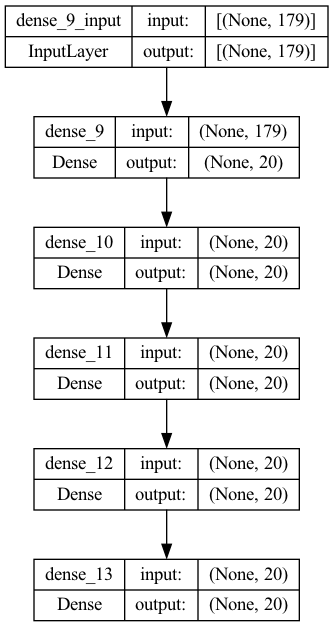

In [105]:
# pip3 install pydot
import pydot

keras.utils.plot_model(model, "model1.png", show_shapes=True)

In [111]:

import matplotlib.pyplot as plt

def plot_training_vs_validation(history,model):
    fig, ax = plt.subplots(1,2,figsize=(10,5))
    ax[0].plot(history.history['accuracy'],'bd--', label = "train_acc")
#     ax[0].plot(history.history['val_accuracy'],'rd--', label = "val_acc")
    ax[1].plot(history.history['loss'],'g*--', label = "train_loss")
#     ax[1].plot(history.history['val_loss'],'c*--', label = "val_loss")
    ax[0].set_title('Training [accuracy]--'+model)
    ax[1].set_title('Training [loss]--'+model)
    ax[0].legend()
    ax[1].legend()
    ax[0].set_xlabel('Epochs')
    ax[1].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[1].set_ylabel('Loss')
    plt.tight_layout()
    plt.show()

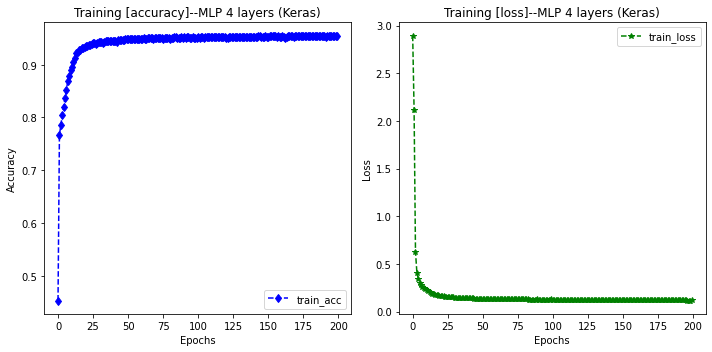

In [112]:
plot_training_vs_validation(history, "MLP 4 layers (Keras)")

In [108]:
history

 680/1563 [============>.................] - ETA: 1s - loss: 0.2917 - accuracy: 0.9393 - f1_m: 0.7577 - precision_m: 0.6168 - recall_m: 1.0000

In [109]:
import pydot

1563/1563 [==============================] - 2s 1ms/step - loss: 0.3599 - accuracy: 0.9334 - f1_m: 0.7783 - precision_m: 0.6435 - recall_m: 1.0000
